In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex
from scipy.stats import skew
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/sample_data/raw.csv')

In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
box_1 = ex.violin(df,x = 'no_of_employees')
box_1.update()
box_1.show()

In [ ]:
skew(df['no_of_employees'])

np.float64(12.264538013698076)

In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
estab = ex.histogram(df,x = 'yr_of_estab',title = 'YEAR OF ESTAB')
estab.update_layout(xaxis_title = 'Year',yaxis_title = 'Count')
estab.show()

In [ ]:
skew(df['yr_of_estab'])

np.float64(-2.0371813343969274)

In [ ]:
df.sample()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
7724,Europe,Bachelor's,Y,N,500,1974,South,31641.24,Year,Y,Certified


In [ ]:
skew(df['prevailing_wage'])

np.float64(0.7557315672643726)

##Continuous Data is visualized nd understood. Let's Fix it.

Data Cleaning Starts Here

<ipython-input-16-7da261e7dd09>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




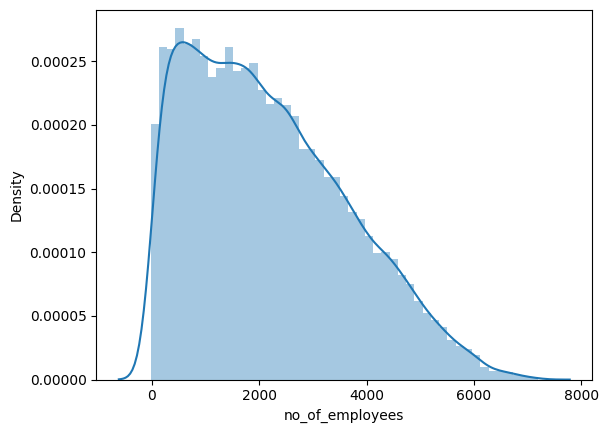

In [ ]:
Q1 = df['no_of_employees'].quantile(0.25)
Q3 = df['no_of_employees'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_1 = df[(df['no_of_employees'] >= lower_bound) & (df['no_of_employees'] <= upper_bound)]
skew(df_1['no_of_employees'])
sns.distplot(df_1['no_of_employees'])
plt.show()

In [ ]:
Q1 = df_1['prevailing_wage'].quantile(0.25)
Q3 = df_1['prevailing_wage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_1 = df_1[(df['prevailing_wage'] >= lower_bound) & (df_1['prevailing_wage'] <= upper_bound)]

<ipython-input-17-9fc5d711037c>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
skew(df_1['prevailing_wage'])

np.float64(0.36956914558078496)

In [ ]:
hist_1 = ex.box(df_1['prevailing_wage'])
hist_1.show()

##Continuous data type is dealth with.

In [ ]:
df_2 = df_1.copy()

In [ ]:
df_2['has_job_experience'] = df_2['has_job_experience'].map({'Y':1,"N":0})
df_2['requires_job_training'] = df_2['requires_job_training'].map({'Y':1,"N":0})
df_2['full_time_position'] = df_2['full_time_position'].map({'Y':1,"N":0})
df_2['case_status'] = df_2['case_status'].map({'Certified':1,"Denied":0})


In [ ]:
df_no_cat = df_2.select_dtypes(exclude=object)
df_cat = df_2.select_dtypes(include=object)

In [ ]:
df_cat.head()

,continent,education_of_employee,region_of_employment,unit_of_wage
1,Asia,Master's,Northeast,Year
3,Asia,Bachelor's,West,Year
4,Africa,Master's,South,Year
5,Asia,Master's,South,Year
6,Asia,Bachelor's,South,Year


<Axes: >

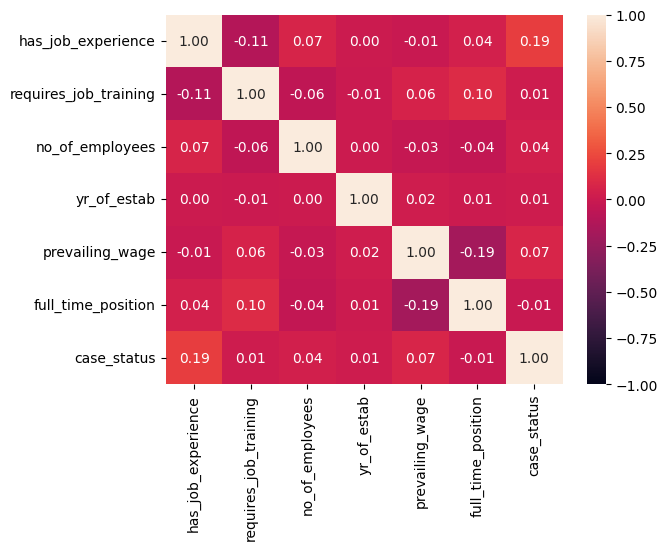

In [ ]:
corr = df_no_cat.corr()

sns.heatmap(corr, cmap = 'rocket', annot=True,vmax =1, vmin = -1, fmt=".2f")

In [ ]:
bar_1 = ex.histogram(df_2, x = 'continent')
bar_1.show()

In [ ]:
df_2['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [ ]:
df_2['continent'] = df_2['continent'].map({'North America': 'America', 'South America': "America", 'Africa':'Others','Oceania':'Others',"Asia":'Asia','Europe':'Europe'})

In [ ]:
bar_1 = ex.histogram(df_2, x = 'continent')
bar_1.show()

In [ ]:
df_2.isna().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


In [ ]:
df_cat.head()

,continent,education_of_employee,region_of_employment,unit_of_wage
1,Asia,Master's,Northeast,Year
3,Asia,Bachelor's,West,Year
4,Africa,Master's,South,Year
5,Asia,Master's,South,Year
6,Asia,Bachelor's,South,Year


In [ ]:
bar_1 = ex.histogram(df_2, x = 'region_of_employment')
bar_1.show()

```
{'region of employment':'Island', 'continent':'others'}
```
 need to be emphasized in model training.

In [ ]:
bar_1 = ex.histogram(df_2, x = 'continent')
bar_1.show()

In [ ]:
df_2['continent'].value_counts()

,count
continent,
Asia,15565
America,3811
Europe,3465
Others,678


In [ ]:
bar_1 = ex.histogram(df_2, x = 'unit_of_wage')
bar_1.show()

In [ ]:
a = df_2['unit_of_wage'].value_counts().to_dict()


In [ ]:
df_2['unit_of_wage'] = df_2['unit_of_wage'].map({'Year':"Year", "Hour":"other","Week":"other",'Month':"other"})

In [ ]:
df_2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,1,0,2412,2002,Northeast,83425.65,Year,1,1
3,Asia,Bachelor's,0,0,98,1897,West,83434.03,Year,1,0
4,Others,Master's,1,0,1082,2005,South,149907.39,Year,1,1
5,Asia,Master's,1,0,2339,2012,South,78252.14,Year,1,1
6,Asia,Bachelor's,0,0,4985,1994,South,53635.39,Year,1,1


In [ ]:
bar_1 = ex.histogram(df_2, x = 'unit_of_wage')
bar_1.show()

##I have done preprocessing, data quality measures except Encoding and correlation analysis. I will do that after i have done the Power BI analysis. Then i will do correlation to see which column to keep and which not.

In [ ]:
df_2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,1,0,2412,2002,Northeast,83425.65,Year,1,1
3,Asia,Bachelor's,0,0,98,1897,West,83434.03,Year,1,0
4,Others,Master's,1,0,1082,2005,South,149907.39,Year,1,1
5,Asia,Master's,1,0,2339,2012,South,78252.14,Year,1,1
6,Asia,Bachelor's,0,0,4985,1994,South,53635.39,Year,1,1


In [ ]:
bar_1 = ex.box(df_2, x = 'yr_of_estab')
bar_1.show()

In [ ]:
Q1 = df_2['yr_of_estab'].quantile(0.25)
Q3 = df_2['yr_of_estab'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_2 = df_2[(df['yr_of_estab'] >= lower_bound) & (df_2['yr_of_estab'] <= upper_bound)]

<ipython-input-42-d325b982ddd5>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
bar_1 = ex.box(df_2, x = 'yr_of_estab')
bar_1.show()

In [ ]:
df_2.to_csv('sample_data/visa.csv')